<a href="https://colab.research.google.com/github/Sravana12/Projects/blob/main/Brain_MRI_segmentation_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset information :
Considered the updated version of previous BratsDatasets used contains 4 channels of information as NIFTI files which have been segmented manually as following :
1.Native(T1)
2.Post-contrast T1-weighed (T1CE)
3.T2-weighted(T2)
4.T2 Fluid Attenuated Inversion Recovery (FLAIR) volumes
Annotations(Labels):
Label 0:Unlabelled volume
Label 1: Necrotic and non-enhancing tumor core(NCR/NET)
Label 2: Peritumoral edema(ED)
Label 3:Missing(No pixels in all the volumes contain label 3)
Label 4:GD-enhancing tumor(ET)

In [ ]:
#Loading required libraries
import numpy as np 
import nibabel as nib 
import tensorflow as tf
import glob
#from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import random
from tifffile import imsave
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import os
import cv2
import glob
import PIL
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from skimage import data
from skimage.util import montage 
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize
from PIL import Image, ImageOps  
import pickle
from pathlib import Path
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import keras
import keras.backend as K
from keras.callbacks import CSVLogger
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras import Input
from tensorflow.keras.models import *
from tensorflow.keras.layers import Input,Dense,Activation,Conv2D,Conv3D,MaxPool2D,MaxPooling3D,UpSampling2D,UpSampling3D,Dense,BatchNormalization,GlobalAvgPool3D,Input,Reshape,multiply,add,Dropout,AvgPool2D,AvgPool3D,MaxPool3D,GlobalAvgPool2D,AveragePooling3D,GlobalAveragePooling2D,GlobalAveragePooling3D,concatenate
from keras.layers.convolutional import Conv3DTranspose,Conv2DTranspose
from keras.regularizers import l2
from tensorflow.keras.layers import Layer, InputSpec
from keras.utils import conv_utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Input
from keras.models import Model
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from keras_contrib.layers import SubPixelUpscaling


In [ ]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-kohw9t6l
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-kohw9t6l
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=777e4a87ba48fdb59c4f61dac02286ba0583ca6fac21506e8643d9d6e03d6398
  Stored in directory: /tmp/pip-ephem-wheel-cache-jhk58va3/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Sep  6 18:53:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7466956926433592474
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16139419648
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9491001813371021032
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
# neural imaging
!pip install nilearn
import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt
!pip install git+https://github.com/miykael/gif_your_nifti # nifti to gif 
import gif_your_nifti.core as gif2nif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 12.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/miykael/gif_your_nifti to /tmp/pip-req-build-k9ngjw8z
  Running command git clone -q https://github.com/miykael/gif_your_nifti /tmp/pip-req-build-k9ngjw8z
  Created wheel for gif-your-nifti: filename=gif_your_nifti-0.2.0-py3-none-any.whl size=6270 sha256=13c054f394381a36f9fb8793a7c16f3b32d4b913501071979ebf78b2655d2812
  Stored in directory: /tmp/pip-ephem-wheel-cache-lfzngpjt/wheels/4a/8c/d1/b228c3b67231f7459e8f70d73f4dadaf65cd90692d41f43e88
Successfully built gif-your-nifti


In [ ]:
!pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=dd8273f93e7d083924fd2589ac758009e9766854598bbc7e0916461d5715f9da
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap


In [ ]:
#Paths for train and validation data
TRAIN_PATH = r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/"
VALIDATION_PATH = r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/"

In [ ]:
#Transforming the single images for training
image_flair=nib.load(TRAIN_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(image_flair.max())
image_flair=scaler.fit_transform(image_flair.reshape(-1,image_flair.shape[-1])).reshape(image_flair.shape)
print(image_flair.max())
image_flair.shape

1854.603271484375
1.0


(240, 240, 155)

In [ ]:
#Loading t1 images 
image_t1=nib.load(TRAIN_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
print(image_t1.max())
image_t1=scaler.fit_transform(image_t1.reshape(-1,image_t1.shape[-1])).reshape(image_t1.shape)
print(image_t1.max())
image_t1.shape

1717.368408203125
1.0


(240, 240, 155)

In [ ]:
#Loading t1ce images 
image_t1ce=nib.load(TRAIN_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
print(image_t1ce.max())
image_t1ce=scaler.fit_transform(image_t1ce.reshape(-1,image_t1ce.shape[-1])).reshape(image_t1ce.shape)
print(image_t1ce.max())
image_t1ce.shape

8309.0
1.0


(240, 240, 155)

In [ ]:
#Loading t2 images
image_t2=nib.load(TRAIN_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
print(image_t2.max())
image_t2=scaler.fit_transform(image_t2.reshape(-1,image_t2.shape[-1])).reshape(image_t2.shape)
print(image_t2.max())
image_t2.shape

5822.11474609375
1.0


(240, 240, 155)

In [ ]:
#Loading mask and converting it from float to unit8
image_mask = nib.load(TRAIN_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
image_mask = image_mask.astype(np.uint8)
print(np.unique(image_mask))

[0 1 2 4]


In [ ]:
#Reassigning mask values from 4 to 3 as 3 is missing 
image_mask[image_mask==4] = 3
print(np.unique(image_mask))

[0 1 2 3]


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Image flair')

Text(0.5, 1.0, 'Image t1')

Text(0.5, 1.0, 'Image t1ce')

Text(0.5, 1.0, 'Image t2')

Text(0.5, 1.0, 'Image mask')

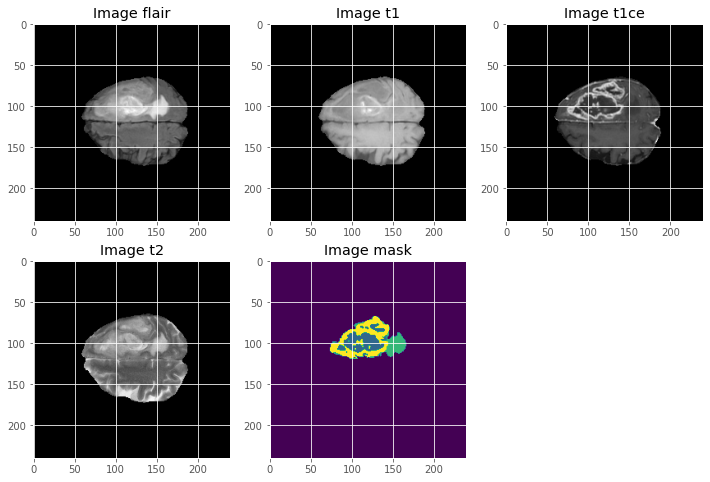

In [ ]:
#Visualizing the images randomly from the loaded dataset
n_slice = random.randint(0, image_mask.shape[2])
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.imshow(image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(image_mask[:,:,n_slice])
plt.title('Image mask')
plt.show()


In [ ]:
#Combining the above images into single multichannelimage here we ignore T1 as the features noticed in mask are more relatable to 
#other volumes here 3 represents the flair ,t1ce and t2 3 channels 
Multiimage = np.stack([image_flair,image_t1ce,image_t2,], axis=3)
print(Multiimage.shape)

(240, 240, 155, 3)


In [ ]:
#cropping the images to 128*128*128*4 from (240, 240, 155, 3) size for images and masks as bulk of outside of these regions are dark 
Multiimage = Multiimage[56:184,56:184,13:141]
image_mask = image_mask[56:184,56:184,13:141]

Multiimage.shape

(128, 128, 128, 3)

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Image flair')

Text(0.5, 1.0, 'Image t1ce')

Text(0.5, 1.0, 'Image t2')

Text(0.5, 1.0, 'Image mask')

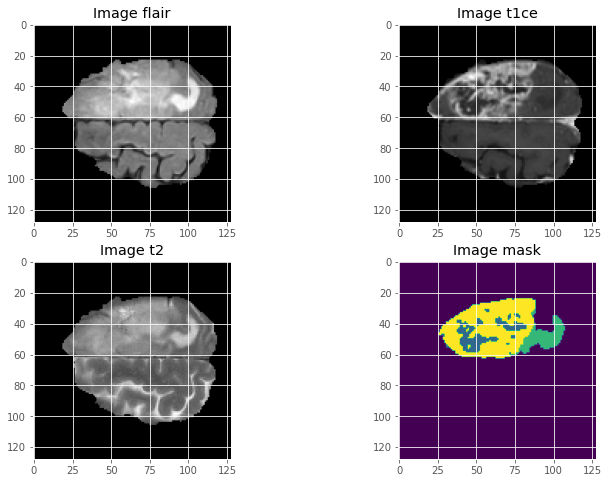

In [ ]:
#Visualizing the multimodal images and masks (after cropping) randomly from the loaded dataset
n_slice = random.randint(0, image_mask.shape[2])
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.imshow(Multiimage[:,:,n_slice,0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(Multiimage[:,:,n_slice,1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(Multiimage[:,:,n_slice,2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(image_mask[:,:,n_slice])
plt.title('Image mask')
plt.show()

In [ ]:
#saving the above images to local disk in numpy format
np.save(TRAIN_PATH + 'Multiimage.npy',Multiimage,allow_pickle=True,fix_imports=True)
#saving the above images to local disk in nii format
#nib.save(TRAIN_PATH + 'Multiimage.nii.gz', Multiimage)

In [ ]:
#Loading the saved numpy image 
numpyimg = np.load(TRAIN_PATH + 'Multiimage.npy',allow_pickle=True,fix_imports=True,encoding='latin1' )
print(numpyimg.shape)

(128, 128, 128, 3)


In [ ]:
#image mask with 4 classes 0,1,2,3 converting it into categorical 
image_mask = to_categorical(image_mask,num_classes=4)
image_mask.shape

(128, 128, 128, 4)

In [ ]:
#Applying this to all other image files 
imaget2_list = sorted(glob.glob(r'/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
imaget1ce_list = sorted(glob.glob(r'/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
imageflair_list = sorted(glob.glob(r'/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
imagemask_list = sorted(glob.glob(r'/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))


In [ ]:
#Training dataset
for i in range(len(imaget2_list)):
    print("Now preparing image and masks number: ", i)
    
    imaget_t2=nib.load(imaget2_list[i]).get_fdata()
    imaget_t2 = scaler.fit_transform(imaget_t2.reshape(-1, imaget_t2.shape[-1])).reshape(imaget_t2.shape)
    
    imaget_t1ce=nib.load(imaget1ce_list[i]).get_fdata()
    imaget_t1ce = scaler.fit_transform(imaget_t1ce.reshape(-1, imaget_t1ce.shape[-1])).reshape(imaget_t1ce.shape)
    
    imaget_flair=nib.load(imageflair_list[i]).get_fdata()
    imaget_flair = scaler.fit_transform(imaget_flair.reshape(-1, imaget_flair.shape[-1])).reshape(imaget_flair.shape)
    
    imaget_mask = nib.load(imagemask_list[i]).get_fdata()
    imaget_mask = imaget_mask.astype(np.uint8)
    imaget_mask[imaget_mask==4] = 3
    
    Multimodalt = np.stack([imaget_flair,imaget_t1ce,imaget_t2], axis=3)
    Multimodalt = Multimodalt[56:184,56:184,13:141]
    imaget_mask = imaget_mask[56:184,56:184,13:141]  
    Multimodalt.shape                                  
    #Gives number of labels of each class 
    val,counts = np.unique(imaget_mask, return_counts=True )
    
    # we filter with the condition that the volume contains atleast 1% useful volume
    if (1 - (counts[0]/counts.sum())) > 0.01:        
        print("saving images")
        imaget_mask = to_categorical(imaget_mask,num_classes=4)
        np.save(r'/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata3channels/images/image_'+ str(i)+'.npy', Multimodalt)
        np.save(r'/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata3channels/masks/mask_'+ str(i)+'.npy', imaget_mask)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
    else: 
        print("No Images saved")       
        
        
#Validation dataset

#for i in range(len(V_imaget2_list)):
    
#    imaget2_V=nib.load(V_imaget2_list[i]).get_fdata()
#    imaget2_V = scaler.fit_transform(V_imaget2.reshape(-1, V_imaget2.shape[-1])).reshape(V_imaget2.shape)
    
#    imaget_t1ce_V=nib.load(V_imaget_t1ce_list[i]).get_fdata()
#    imaget_t1ce_V = scaler.fit_transform(V_imaget_t1ce.reshape(-1, V_imaget_t1ce.shape[-1])).reshape(V_imaget_t1ce.shape)
    
#    imaget_flair_V=nib.load(imageflair_list[i]).get_fdata()
#    imaget_flair_V = scaler.fit_transform(V_imaget_flair.reshape(-1, V_imaget_flair.shape[-1])).reshape(V_imaget_flair.shape)
    
#    imaget_mask = nib.load(imagemask_list[i]).get_fdata()
#    imaget_mask = imaget_mask.astype(np.uint8)
#    imaget_mask[imaget_mask==4] = 3
    
#    MultimodalV = np.stack([imaget_flair,imaget_t1ce,imaget_t2], axis=3)
#    MultimodalV = MultimodalV[56:184,56:184,13:141]
    
#    val,counts = np.unique(imaget_mask, return_counts=True )
    
#    if (1 - (counts[0]/counts.sum())) > 0.01:
#        print("saving images")
#        imaget_mask = to_categorical(imaget_mask,num_classes=4)
#        np.save(TRAIN_PATH +'images/image_'+ str(i)+'.npy', Multimodalt)
#        np.save(TRAIN_PATH +'masks/mask_'+ str(i)+'.npy', imaget_mask)
        
#    else:
#        print("No images saved")

        
        
        
    

Now preparing image and masks number:  0


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  1


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  2


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  3


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  4


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  5


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  6


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  7


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  8


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  9


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  10


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  11


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  12


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  13


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  14


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  15


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  16


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  17


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  18


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  19


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  20


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  21


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  22


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  23


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  24


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  25


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  26


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  27


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  28


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  29


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  30


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  31


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  32


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  33


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  34


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  35


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  36


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  37


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  38


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  39


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  40


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  41


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  42


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  43


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  44


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  45


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  46


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  47


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  48


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  49


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  50


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  51


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  52


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  53


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  54


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  55


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  56


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  57


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  58


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  59


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  60


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  61


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  62


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  63


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  64


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  65


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  66


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  67


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  68


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  69


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  70


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  71


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  72


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  73


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  74


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  75


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  76


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  77


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  78


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  79


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  80


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  81


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  82


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  83


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  84


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  85


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  86


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  87


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  88


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  89


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  90


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  91


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  92


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  93


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  94


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  95


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  96


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  97


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  98


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  99


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  100


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  101


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  102


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  103


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  104


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  105


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  106


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  107


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  108


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  109


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  110


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  111


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  112


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  113


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  114


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  115


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  116


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  117


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  118


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  119


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  120


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  121


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  122


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  123


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  124


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  125


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  126


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  127


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  128


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  129


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  130


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  131


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  132


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  133


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  134


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  135


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  136


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  137


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  138


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  139


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  140


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  141


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  142


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  143


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  144


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  145


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  146


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  147


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  148


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  149


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  150


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  151


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  152


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  153


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  154


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  155


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  156


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  157


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  158


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  159


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  160


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  161


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  162


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  163


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  164


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  165


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  166


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  167


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  168


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  169


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  170


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  171


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  172


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  173


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  174


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  175


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  176


(128, 128, 128, 3)

No Images saved
Now preparing image and masks number:  177


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  178


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  179


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  180


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  181


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  182


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  183


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  184


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  185


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  186


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  187


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  188


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  189


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  190


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  191


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  192


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  193


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  194


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  195


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  196


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  197


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  198


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  199


(128, 128, 128, 3)

saving images
Now preparing image and masks number:  200


(128, 128, 128, 3)

saving images


In [ ]:
 !pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sockets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#split the data into train and test 
import splitfolders
input_folder = r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata3channels/"
output_folder = r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/"
splitfolders.ratio(input_folder,output=output_folder,seed=42,ratio=(.75,.25),group_prefix=None)


Copying files: 370 files [07:08,  1.16s/ files]


In [ ]:

#lOADING THE NUMPY IMAGES FROM LOCAL FOLDER

def loadimg(image_dir,image_list):
    images=[]
    for i , image_name in enumerate(image_list):
        if (image_name.split('.')[1] == 'npy'):
            image=np.load(image_dir+image_name,allow_pickle=True,fix_imports=True,encoding='latin1')
            images.append(image)
    images = np.array(images)
    
    return(images)

def loadimager(image_dir,image_list,mask_dir,mask_list,batch_size):
    
            
    l = len(image_list)
    print(l)
    
    
    while True:
        
        batch_start = 0
        batch_end = batch_size
        
        while batch_start < l:
            batchlimit = min(batch_end, l)
            
            
            X = loadimg(image_dir,image_list[batch_start:batchlimit])
            Y = loadimg(mask_dir,mask_list[batch_start:batchlimit])
            
            yield (X,Y)
            
            batch_start += batch_size
            batch_end   += batch_size
            
            

            

138


(2, 128, 128, 128, 3)

(2, 128, 128, 128, 4)

(128, 128, 128, 3)

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Image flair')

Text(0.5, 1.0, 'Image t1ce')

Text(0.5, 1.0, 'Image t2')

Text(0.5, 1.0, 'Mask')

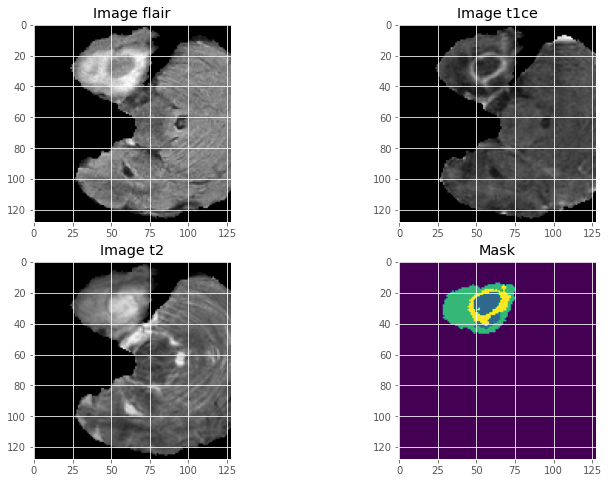

In [ ]:
#Passing inputs to the function defined

image_dir = r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/train/images/"
mask_dir =  r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/train/masks/"

image_list=  os.listdir(image_dir)

mask_list=   os.listdir(mask_dir)

batch_size = 2

train_datagenerator = loadimager(image_dir,image_list,mask_dir,mask_list,batch_size)

image,mask = train_datagenerator.__next__()
image.shape
mask.shape

image_num = random.randint(0,image.shape[0]-1)
test_image=image[image_num]
test_image.shape
test_mask=mask[image_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_image[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_image[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_image[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Image flair')

Text(0.5, 1.0, 'Image t1ce')

Text(0.5, 1.0, 'Image t2')

Text(0.5, 1.0, 'Mask')

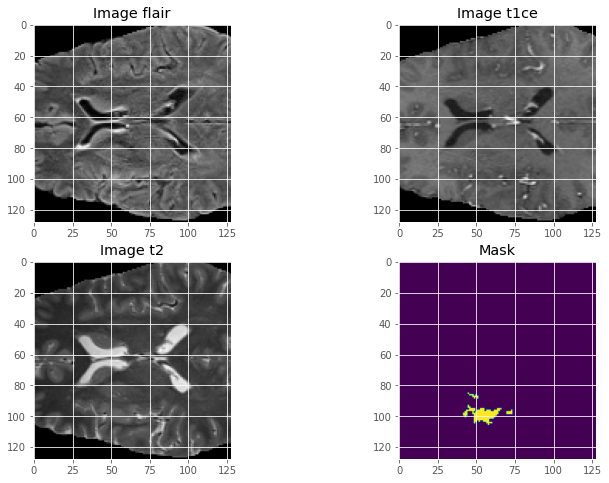

In [ ]:

    
#Images size are in 128x128x128x3 npy data (3 --> 3 channels for  test_image_flair, test_image_t1ce, test_image_t2)
#Define U-Net input based on the number of channels like 2 channels or 3 channels 
#Masks are expected to be 128x128x128x4 npy data (4 corresponds to the 4 classes / labels)

import os
import numpy as np
#import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random

####################################################
image_dir = r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/train/images/"
mask_dir =  r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/train/masks/"


img_list = os.listdir(image_dir)
msk_list = os.listdir(mask_dir)

num_images = len(os.listdir(image_dir))

img_num = random.randint(0,num_images-1)
test_image = np.load(image_dir+img_list[img_num])
test_mask = np.load(mask_dir+msk_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_image[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_image[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_image[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:

#Finding the distribution of classes

import pandas as pd
columns = ['0','1', '2', '3']
df = pd.DataFrame(columns=columns)
train_mask_list = sorted(glob.glob(r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/train/masks/*.npy"))
for img in range(len(train_mask_list)):
    print(img)
    tmp_image=np.load(train_mask_list[img])
    tmp_image = np.argmax(tmp_image, axis=3)
    val, counts = np.unique(tmp_image, return_counts=True)
    zipped = zip(columns, counts)
    conts_dict = dict(zipped)
    
    df = df.append(conts_dict, ignore_index=True)

label_0 = df['0'].sum()
label_1 = df['1'].sum()
label_2 = df['1'].sum()
label_3 = df['3'].sum()
total_labels = label_0 + label_1 + label_2 + label_3
num_classes = 4
#Class weights claculation: n_samples / (num_classes * n_samples_for_class)
weight0 = round((total_labels/(num_classes*label_0)), 2) #round to 2 decimals
weight1 = round((total_labels/(num_classes*label_1)), 2)
weight2 = round((total_labels/(num_classes*label_2)), 2)
weight3 = round((total_labels/(num_classes*label_3)), 2)
print(weight0,weight1,weight2,weight3)
                                   
#Here we get the weights and these weights can be used for Dice loss                                  
#Define the image datasets for training and validation

train_img_dir = r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/train/images/"
train_mask_dir = r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/train/masks/"

val_img_dir = r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/val/images/"
val_mask_dir = r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/val/masks/"
                                   

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
0.26 36.75 36.75 24.58


47


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Image flair')

Text(0.5, 1.0, 'Image t1ce')

Text(0.5, 1.0, 'Image t2')

Text(0.5, 1.0, 'Mask')

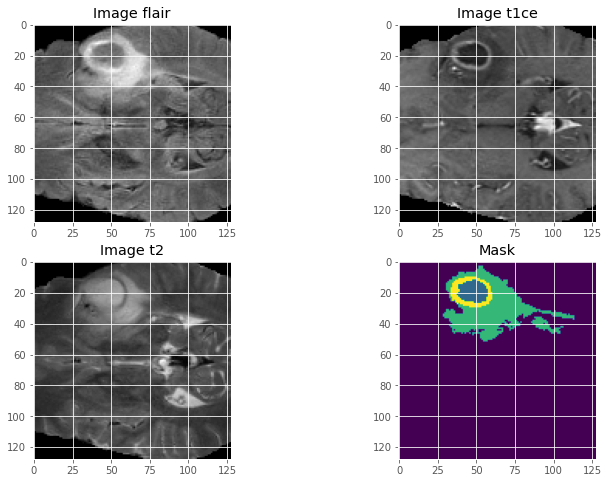

In [ ]:
#Weights calculated in the above step are 0.26 36.75 36.75 24.58
#Processing Training and validation  data 
batch_size = 3
train_datagenerator = loadimager(train_img_dir,train_img_list,train_mask_dir,train_mask_list,batch_size)
val_img_datagenerator = loadimager(val_img_dir,val_img_list,val_mask_dir,val_mask_list,batch_size)


#image,mask = train_datagenerator.__next__()
image,mask = val_img_datagenerator.__next__()

image_num = random.randint(0,image.shape[0]-1)
test_image=image[image_num]
test_mask=mask[image_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_image[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_image[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_image[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
#Installing 3D-Models
!pip install segmentation-models-3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 50 kB 4.4 MB/s 


In [ ]:
#Calculating the loss,metrics and optimizer to be used for training best combination of dice loss and focal loss
weight0, weight1, weight2, weight3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss(class_weights=np.array([weight0, weight1, weight2, weight3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

Learningrate = 0.0001
optimizer =tf.keras.optimizers.Adam(Learningrate)
optimizer

Segmentation Models: using `tf.keras` framework.


In [ ]:
#Defining the 3D U-Net Model
!pip install tensorflow
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.python.keras.optimizers import *
#from tf.keras.optimizers import Adam
from keras.metrics import MeanIoU

kernel_initializer =  'he_uniform' 


################################################################
def UNet3D_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.2)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)
    
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)
     
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.3)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)
     
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.3)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)
     
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.4)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)
    
    #Expansive path 
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.3)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
     
    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.3)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)
     
    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)
     
    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)
     
    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible. 
    model.summary()
    
    return model

 
model = UNet3D_model(128, 128, 128, 3, 4)
print(model.input_shape)
print(model.output_shape)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  1312        ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 12  0           ['conv3d[0][0]']             

In [ ]:
# Fitting the model for 3D U-Net

steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size
print(steps_per_epoch,val_steps_per_epoch)

model = UNet3D_model(IMG_HEIGHT=128, 
                     IMG_WIDTH=128, 
                     IMG_DEPTH=128, 
                     IMG_CHANNELS=3, 
                     num_classes=4)

model.compile(optimizer = optimizer, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)

history=model.fit(train_datagenerator,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_data=val_img_datagenerator,
          validation_steps=val_steps_per_epoch,
          )

model.save('brats_3d.hdf5')

46 15
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d_19 (Conv3D)             (None, 128, 128, 12  1312        ['input_2[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout_9 (Dropout)            (None, 128, 128, 12  0           ['conv3d_19[0][0]']              
                                8, 16)                                                

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

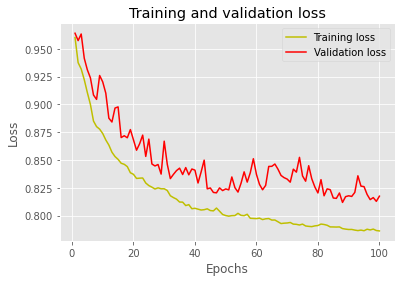

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

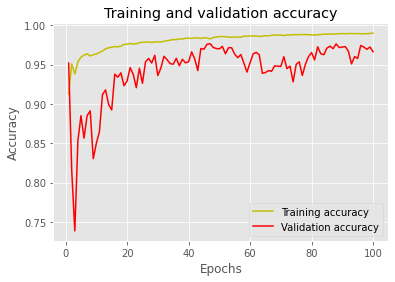

In [ ]:
#plot the training and validation IoU and loss at each epoch for 3D-U-Net
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Testing Image')

Text(0.5, 1.0, 'Testing Label')

Text(0.5, 1.0, 'Prediction on test image')

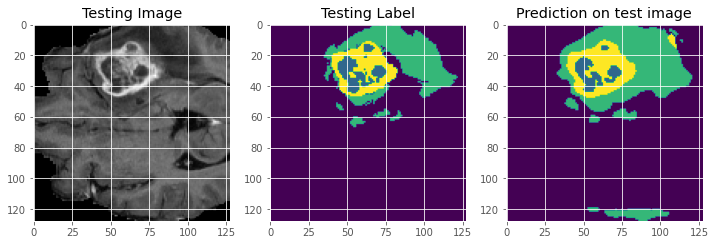

In [ ]:
from keras.models import load_model


my_model = load_model('brats_3d.hdf5')

#So let us add the loss as custom object... but the following throws another error...
#Unknown metric function: iou_score
my_model = load_model('brats_3d.hdf5', 
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss})

#Now, let us add the iou_score function we used during our initial training
my_model = load_model('brats_3d.hdf5', 
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                      'iou_score':sm.metrics.IOUScore(threshold=0.5)})

#Now all set to continue the training process. 
history=my_model.fit(train_datagenerator,
          steps_per_epoch=steps_per_epoch,
          epochs=1,
          verbose=1,
          validation_data=val_img_datagenerator,
          validation_steps=val_steps_per_epoch,
          )
#################################################

#For predictions you do not need to compile the model, so ...
my_model = load_model('brats_3d.hdf5', 
                      compile=False)


#Verify IoU on a batch of images from the test dataset
#Using built in keras function for IoU
#Only works on TF > 2.0
from keras.metrics import MeanIoU

batch_size=8 #Check IoU for a batch of images
test_img_datagen = loadimager(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

num_classes = 4
IOU_keras = MeanIoU(num_classes=num_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

#############################################
#Predict on a few test images, one at a time
#Try images: 
img_num = 183

#test_img = np.load("BraTS2020_TrainingData/input_data_128/val/images/image_"+str(img_num)+".npy")
test_img = np.load(r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/val/images/image_"+str(img_num)+".npy")

#test_mask = np.load("BraTS2020_TrainingData/input_data_128/val/masks/mask_"+str(img_num)+".npy")
test_mask = np.load(r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))


#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

In [ ]:
#Defining the 3D Densenet Model
!pip install tensorflow
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.python.keras.optimizers import *
#from tf.keras.optimizers import Adam
from keras.metrics import MeanIoU
from tensorflow.keras.layers import *
from tensorflow.keras import layers

kernel_initializer =  'he_uniform' 


################################################################

def get_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH):
  inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH,3))

  x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
  x = layers.MaxPool3D(pool_size=2)(x)
  x = layers.BatchNormalization()(x)

  x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPool3D(pool_size=2)(x)
  x = layers.BatchNormalization()(x)

  x = layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.MaxPool3D(pool_size=2)(x)
  x = layers.BatchNormalization()(x)

  x = layers.Conv3D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.MaxPool3D(pool_size=2)(x)
  x = layers.BatchNormalization()(x)

  x = layers.GlobalAveragePooling3D()(x)
  x = layers.Dense(units=512, activation="relu")(x)
  x = layers.Dropout(0.3)(x)

  outputs = layers.Dense(num_classes, activation="softmax")(x)
  

  # Define the model.
  model1 = keras.Model(inputs,outputs, name="3d_Dense")
  return model

# Build model.
model1 = get_model(128,128,128)
model1.summary()



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d_19 (Conv3D)             (None, 128, 128, 12  1312        ['input_2[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout_9 (Dropout)            (None, 128, 128, 12  0           ['conv3d_19[0][0]']        

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

In [ ]:
# Compile model.
batch_size = 3
steps_per_epoch = len(train_img_list)//batch_size
print(steps_per_epoch)
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model1.compile(
    loss="CategoricalCrossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["accuracy"],
)

# Define callbacks.
#checkpoint_cb = keras.callbacks.ModelCheckpoint(
#    "3d_image_classification_dense.h5", save_best_only=True
#)
#early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)

# Train the model, doing validation at the end of each epoch
history=model1.fit(
    train_datagenerator,
    steps_per_epoch = steps_per_epoch,
    validation_data=val_img_datagenerator,
    epochs=100,
    shuffle=True,
    verbose=1,
    validation_steps=val_steps_per_epoch
)
model.save('brats_3d.densecnn')

46
Epoch 1/100
46/46 [==============================] - 76s 2s/step - loss: 0.0331 - accuracy: 0.9891 - val_loss: 0.0842 - val_accuracy: 0.9732
Epoch 2/100
46/46 [==============================] - 73s 2s/step - loss: 0.0290 - accuracy: 0.9899 - val_loss: 0.0686 - val_accuracy: 0.9772
Epoch 3/100
46/46 [==============================] - 73s 2s/step - loss: 0.0278 - accuracy: 0.9900 - val_loss: 0.0621 - val_accuracy: 0.9796
Epoch 4/100
46/46 [==============================] - 73s 2s/step - loss: 0.0275 - accuracy: 0.9901 - val_loss: 0.0631 - val_accuracy: 0.9786
Epoch 5/100
46/46 [==============================] - 73s 2s/step - loss: 0.0269 - accuracy: 0.9902 - val_loss: 0.0681 - val_accuracy: 0.9771
Epoch 6/100
46/46 [==============================] - 73s 2s/step - loss: 0.0272 - accuracy: 0.9900 - val_loss: 0.0617 - val_accuracy: 0.9794
Epoch 7/100
46/46 [==============================] - 73s 2s/step - loss: 0.0292 - accuracy: 0.9894 - val_loss: 0.0790 - val_accuracy: 0.9748
Epoch 8/10

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

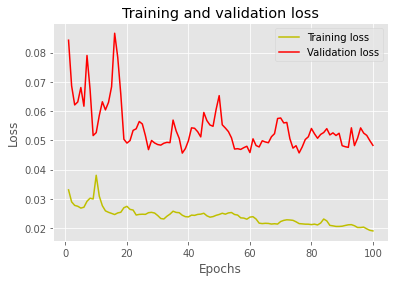

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

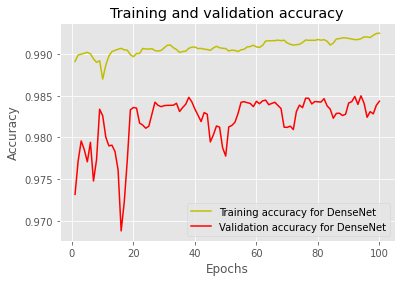

In [ ]:

#plot the training and validation IoU and loss at each epoch for 3D-U-Net
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy for DenseNet')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy for DenseNet')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Testing Image')

Text(0.5, 1.0, 'Testing Label')

Text(0.5, 1.0, 'Prediction on test image')

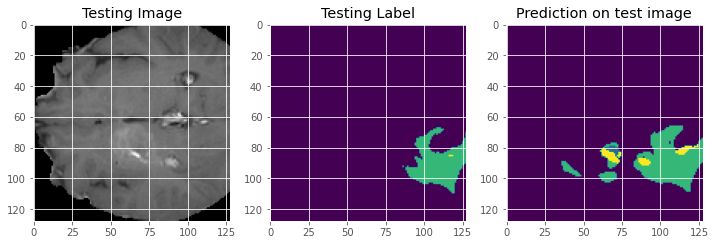

In [ ]:
from keras.models import load_model

#Load model for prediction or continue training
#For continuing training....
#The following gives an error: Unknown loss function: dice_loss_plus_1focal_loss
#This is because the model does not save loss function and metrics. So to compile and 
#continue training we need to provide these as custom_objects.
my_model = load_model('brats_3d.densecnn')

#So let us add the loss as custom object... but the following throws another error...
#Unknown metric function: iou_score
my_model = load_model('brats_3d.densecnn', 
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss})

#Now, let us add the iou_score function we used during our initial training
my_model = load_model('brats_3d.densecnn', 
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                      'iou_score':sm.metrics.IOUScore(threshold=0.5)})

#################################################

#For predictions you do not need to compile the model, so ...
my_model = load_model('brats_3d.densecnn', 
                      compile=False)


#Verify IoU on a batch of images from the test dataset
#Using built in keras function for IoU
#Only works on TF > 2.0
from keras.metrics import MeanIoU

batch_size=8 #Check IoU for a batch of images
test_img_datagen = loadimager(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = model1.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

num_classes = 4
IOU_keras = MeanIoU(num_classes=num_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

#############################################
#Predict on a few test images, one at a time
#Try images: 
img_num = 191

#test_img = np.load("BraTS2020_TrainingData/input_data_128/val/images/image_"+str(img_num)+".npy")
test_img = np.load(r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/val/images/image_"+str(img_num)+".npy")

#test_mask = np.load("BraTS2020_TrainingData/input_data_128/val/masks/mask_"+str(img_num)+".npy")
test_mask = np.load(r"/content/gdrive/MyDrive/Brats_datasetInp/BraTS2020_TrainingData/inputdata_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = model1.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))


#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()